In [3]:
###Figuring out the working directory###
import os

os.getcwd()

'/Users/me'

In [ ]:
###Assignment 1###

In [30]:
import pandas as pd
df_1 = pd.read_csv('path/RSD_10_01_05_2020.csv')

In [31]:
df_2 = pd.read_csv('path/RSD_10_06_10_2020.csv')

In [32]:
###Check shape of both DataFrames##
print(df_1.shape)
print(df_2.shape)

(1441, 3)
(1441, 3)


In [33]:
###Check columns of both DataFrames##
print(df_1.columns)
print(df_2.columns)

Index(['HDR', 'ROLLING SYSTEM DEMAND', 'Unnamed: 2'], dtype='object')
Index(['HDR', 'ROLLING SYSTEM DEMAND', 'Unnamed: 2'], dtype='object')


In [34]:
###Change columns names of both DataFrames###

df_1.columns = ['HDR', 'Rolling System', 'Demand']

df_2.columns = ['HDR', 'Rolling System', 'Demand']

In [35]:
###make sure column names of both DataFrames were successfully changed###
print(df_1.columns) 
print(df_2.columns)
#both DataFrame column names changed successfully

Index(['HDR', 'Rolling System', 'Demand'], dtype='object')
Index(['HDR', 'Rolling System', 'Demand'], dtype='object')


In [36]:
df_1.tail(3) #last value in the DataFrame is a NAN so, remove

,HDR,Rolling System,Demand
1438,VD,2.020100e+13,22520.0
1439,VD,2.020100e+13,22477.0
1440,FTR,1.440000e+03,NaN


In [37]:
df_1 = df_1.drop(1440, axis=0) #dropped the last row

In [38]:
df_1.shape #confirmed that the last row was removed

(1440, 3)

In [39]:
df_2.tail(3) #last value in the DataFrame in a NAN, so remove from DataFrame

,HDR,Rolling System,Demand
1438,VD,2.020100e+13,21665.0
1439,VD,2.020100e+13,21658.0
1440,FTR,1.440000e+03,NaN


In [40]:
df_2 = df_2.drop(1440, axis=0) #dropped the last row

In [41]:
df_2.shape #confirmed that the last row was removed

(1440, 3)

In [42]:
###Index position 0 to 12 represents usage (MW) for the first hour###
###Each row represents usage for 5 minutes###

print(df_1['Demand'][0:13])

0     24475.0
1     24741.0
2     24715.0
3     24652.0
4     24704.0
5     24694.0
6     24694.0
7     24853.0
8     24864.0
9     24794.0
10    24714.0
11    24699.0
12    24534.0
Name: Demand, dtype: float64


In [43]:
df_3 = pd.concat([df_1, df_2], ignore_index=True)

In [44]:
df_3.shape #yes, the new DataFrame has 2880 rows as expected

(2880, 3)

In [45]:
###Summing up every twelve rows to get Demand per hour###
series_demand = df_3['Demand'].groupby(df_3['Demand'].index // 12).sum()

In [46]:
type(series_demand) #confirm that object is a series

pandas.core.series.Series

In [48]:
import numpy as np

series_hours = pd.Series(np.arange(1, 25)) #creates series object from int 1 to 24

print(series_hours) #Print to confirm

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
dtype: int64


Text(0.5, 1.0, 'Electricity Demands per Hour')

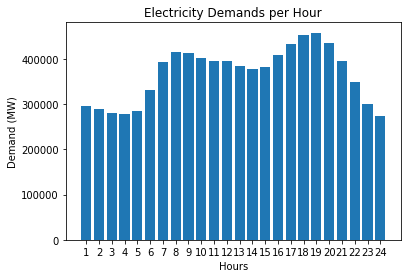

In [49]:
import matplotlib.pyplot as plt

###Bar graph of Electricity Demand per hour for the first 24 hours###

plt.bar(series_hours, series_demand[0:24])
plt.xticks(list(range(1, 25)))
plt.ylabel('Demand (MW)')
plt.xlabel('Hours')
plt.title('Electricity Demands per Hour')

In [50]:
series_demand.shape #240 rows

(240,)

In [51]:
series_full_hours = pd.Series(np.arange(1, 241)) #creates series object from int 1 to 240

print(series_full_hours.tail())

235    236
236    237
237    238
238    239
239    240
dtype: int64


Text(0.5, 1.0, 'Electricity Demands per Hour')

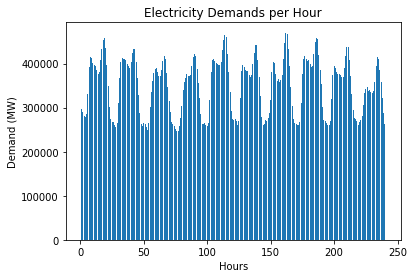

In [54]:
###Bar graph of Electricity Demand per hour for ten days###

plt.bar(series_full_hours, series_demand[0:241])
plt.ylabel('Demand (MW)')
plt.xlabel('Hours')
plt.title('Electricity Demands per Hour')

In [ ]:
###Assignment 2###

In [62]:
###Function definition of a Biased die###
##Just tinkering##
#import random as ra
#def biased_die(num):
    #die = [1, 2, 3, 4, 5, 6]
    #rolls = ra.choices(die, weights=[15, 15, 15, 15, 15, 25], k=num)
    #return list(rolls)

In [64]:
#more tinkering#
#biased_die(10) #10 rolls

[5, 4, 6, 1, 2, 5, 5, 4, 3, 6]

In [65]:
###Function definition of an unbiased die###
#more tinkering#
#def unbiased_die(num):
    #die = [1, 2, 3, 4, 5, 6]
    #rolls = ra.choices(die, k=num)
    #return list(rolls)

In [66]:
#unbiased_die(5)

[6, 1, 5, 3, 1]

In [1]:
import random as ra
def both_die(num):
    die = [1, 2, 3, 4, 5, 6]
    rolls_biased = ra.choices(die, weights=[15, 15, 15, 15, 15, 25], k=num)
    rolls_unbiased = ra.choices(die, k=num)
    return [rolls_unbiased, rolls_biased]
    

In [98]:
###Use the function below###
results = both_die(5) #indicate how many rolls you need from the unbiased and biased dies here

In [99]:
results[0]

[3, 5, 4, 4, 1]

In [100]:
results[1]

[3, 6, 2, 6, 2]

In [101]:
#df_unbiased = pd.DataFrame(results[0])
#df_biased = pd.DataFrame(results[1])

df = pd.DataFrame({'Unbiased die': results[0], 
                  'Biased die': results[1]})

Text(0, 0.5, 'Frequency')

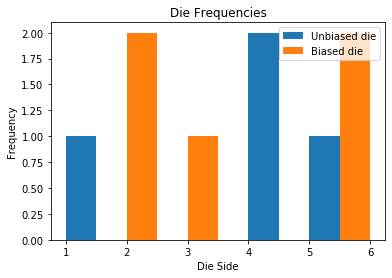

In [102]:
###Graph the simulations###

ax = df.plot.hist()
ax.set_title('Die Frequencies')
ax.set_xlabel('Die Side')
ax.set_ylabel('Frequency')

In [5]:
import random as ra
import matplotlib as plt 
import pandas as pd 
def roll_and_plot(num):
    die = [1, 2, 3, 4, 5, 6]
    rolls_biased = ra.choices(die, weights=[15, 15, 15, 15, 15, 25], k=num)
    rolls_unbiased = ra.choices(die, k=num)
    [rolls_unbiased, rolls_biased]

    df = pd.DataFrame({'Unbiased die': rolls_unbiased, 
                  'Biased die': rolls_biased})
    
    ax = df.plot.hist()
    ax.set_title('Die Frequencies')
    ax.set_xlabel('Die Side')
    ax.set_ylabel('Frequency')

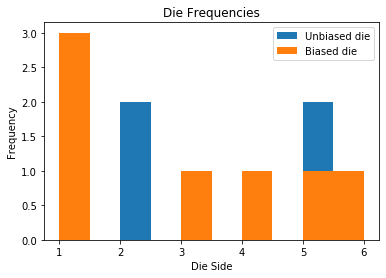

In [7]:
roll_and_plot(7)